In [12]:
"""
kretschmann.ipynb

Created by Chris Stevens 2023
Copyright (c) 2023 University of Canterbury. All rights reserved.
"""

################################################################################
# Import required libraries and open simulation files
################################################################################

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

file      = h5py.File('sim.hdf','r')
interval  = list(file.get("Raw_Data").keys())[0]
iteration = len(file.get('Raw_Data/' + interval))
keys      = sorted(map(int,list(file.get('Raw_Data/' + interval).keys())))
start     = keys[0]
end       = keys[-1]

In [6]:
################################################################################
# Read in the times, constraints and spatial grid
################################################################################

rho    = []
rhop   = []
sigma  = []
sigmap = []
psi0   = []
psi4   = []
t      = []
i = start
while(i < end):
    data  = file.get('Raw_Data').get(interval).get(str(i))[()]
    data2 = file.get('Time').get(interval).get(str(i))
    rho.append(data[3])
    rhop.append(data[4])
    sigma.append(data[5])
    sigmap.append(data[6])
    psi0.append(data[7])
    psi4.append(data[8])
    t.append(data2[0])

    i += 1
rho    = np.array(rho)
rhop   = np.array(rhop)
sigma  = np.array(sigma)
sigmap = np.array(sigmap)
psi0   = np.array(psi0)
psi4   = np.array(psi4)

z = np.linspace(-1.,1.,len(file.get('Raw_Data').get(interval).get(str(start))[0]))

In [7]:
################################################################################
# Compute the Kretschmann scalar
################################################################################

psi2    = sigma*sigmap - rho*rhop
kretsch = psi0*psi4 + 3.*psi2**2.

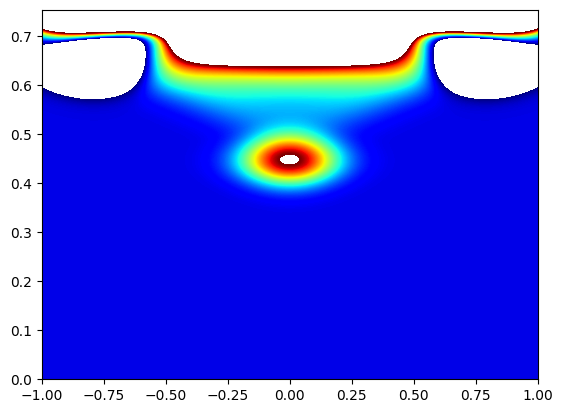

In [11]:
################################################################################
# Plot of the Kretschmann scalar
################################################################################

fig = plt.figure()
ax  = plt.gca()

cs = plt.contourf(z, t, kretsch.real, cmap = cm.jet, levels = np.linspace(-100., 1000., 1000))